 # Chopped Analysis

Data courtesy of Jeffrey Braun (https://www.kaggle.com/jeffreybraun/chopped-10-years-of-episode-data)

### Importing necessary libraries

In [1]:
import numpy as np               # Version: 1.18.5
import pandas as pd              # Version: 1.10.0
import matplotlib.pyplot as plt  # Version: 3.3.0

### Reading data from the CSV

In [2]:
chopped_data = pd.read_csv("chopped.csv")

In [3]:
chopped_data.head()

,season,season_episode,series_episode,episode_name,episode_notes,air_date,judge1,judge2,judge3,appetizer,entree,dessert,contestant1,contestant1_info,contestant2,contestant2_info,contestant3,contestant3_info,contestant4,contestant4_info
0,1,1,1,"""Octopus, Duck, Animal Crackers""",This is the first episode with only three offi...,13-Jan-09,Marc Murphy,Alex Guarnaschelli,Aarón Sánchez,"baby octopus, bok choy, oyster sauce, smoked ...","duck breast, green onions, ginger, honey","prunes, animal crackers, cream cheese",Summer Kriegshauser,Private Chef and Nutrition Coach New York NY,Perry Pollaci,Private Chef and Sous chef Bar Blanc New Yo...,Katie Rosenhouse,Pastry Chef Olana Restaurant New York NY,Sandy Davis,Catering Chef Showstoppers Catering at Union...
1,1,2,2,"""Tofu, Blueberries, Oysters""",This is the first of a few episodes with five ...,20-Jan-09,Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,"firm tofu, tomato paste, prosciutto","daikon, pork loin, Napa cabbage, Thai chiles,...","phyllo dough, gorgonzola cheese, pineapple ri...",Raymond Jackson,Private Caterer and Culinary Instructor West...,Klaus Kronsteiner,Chef de cuisine Liberty National Golf Course...,Christopher Jackson,Executive Chef and Owner Ted and Honey Broo...,Pippa Calland,Owner and Chef Chef for Hire LLC Newville PA
2,1,3,3,"""Avocado, Tahini, Bran Flakes""",NaN,27-Jan-09,Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,"lump crab meat, dried shiitake mushrooms, pin...","ground beef, cannellini beans, tahini paste, ...","brioche, cantaloupe, pecans, avocados",Margaritte Malfy,Executive Chef and Co-owner La Palapa New Y...,Rachelle Rodwell,Chef de cuisine SoHo Grand Hotel New York NY,Chris Burke,Private Chef New York NY,Andre Marrero,Chef tournant L’Atelier de Joël Robuchon Ne...
3,1,4,4,"""Banana, Collard Greens, Grits""","In the appetizer round, Chef Chuboda refused t...",3-Feb-09,Scott Conant,Amanda Freitag,Geoffrey Zakarian,"ground beef, wonton wrappers, cream of mushro...","scallops, collard greens, anchovies, sour cream","maple syrup, black plums, almond butter, waln...",Sean Chudoba,Executive Chef Ayza Wine Bar New York NY,Kyle Shadix,Chef Registered Dietician and Culinary Consu...,Luis Gonzales,Executive Chef Knickerbocker Bar & Grill Ne...,Einat Admony,Chef and Owner Taïm New York NY
4,1,5,5,"""Yucca, Watermelon, Tortillas""",NaN,10-Feb-09,Geoffrey Zakarian,Alex Guarnaschelli,Marc Murphy,"watermelon, canned sardines, pepper jack chee...","beef shoulder, yucca, raisins, ancho chiles, ...","flour tortillas, prosecco, Canadian bacon, ro...",John Keller,Personal Chef New York NY,Andrea Bergquist,Executive Chef New York NY,Ed Witt,Executive Chef / Wine Director Bloomingdale ...,Josh Emett,Chef de cuisine Gordon Ramsay at The London ...


## Question 1: Which judges judge the most?
### Group the data by judges, and then count the number of judges
Notice that in the data set some judges appear multiple times with several spellings, this will have to be fixed

In [4]:
judge1_app = chopped_data.groupby(["judge1"])["series_episode"].count()
judge2_app = chopped_data.groupby(["judge2"])["series_episode"].count()
judge3_app = chopped_data.groupby(["judge3"])["series_episode"].count()

print(judge1_app.head())
print(judge2_app.head())
print(judge3_app.head())

judge1
Aarón Sanchez          7
Aarón Sánchez         53
Adam Moskowitz         1
Adam Sobel             1
Alex Guarnaschelli     6
Name: series_episode, dtype: int64
judge2
Aarón Sanchez           3
Aarón Sánchez           8
Alex Guarnaschelli    198
Amanda Freitag        158
Amanda Frietag          1
Name: series_episode, dtype: int64
judge3
Aarón Sanchez          4
Aarón Sánchez         65
Adam Sobel             1
Alex Guarnaschelli     4
Alex Stupak            5
Name: series_episode, dtype: int64


### Concatenae all judge data into one Pandas series
Also fixed the judge mispellings

In [5]:
judge_app = judge1_app.add(judge2_app, fill_value = 0).add(judge3_app, fill_value = 0)

judge_app["Aarón Sánchez"] += judge_app["Aarón Sanchez"] 
judge_app.drop(labels = ["Aarón Sanchez"], inplace = True)

judge_app["Chris Santos"] += judge_app["Chris Santo"]
judge_app.drop(labels = ["Chris Santo"], inplace = True)

judge_app["Amanda Freitag"] += judge_app["Amanda Freita"]
judge_app.drop(labels = ["Amanda Freita"], inplace = True)

judge_app["Geoffrey Zakarian"] += judge_app["Geoffrey Zacharian"]
judge_app.drop(labels = ["Geoffrey Zacharian"], inplace = True)

print(judge_app)

Aarón Sánchez         140.0
Adam Moskowitz          1.0
Adam Sobel              2.0
Alex Guarnaschelli    208.0
Alex Stupak             5.0
                      ...  
Ulrich Koberstein       1.0
Valerie Bertinelli      1.0
Wylie Dufresn           1.0
Zac Youn                3.0
Zakary Pelaccio         4.0
Name: series_episode, Length: 120, dtype: float64


### Plotting the data

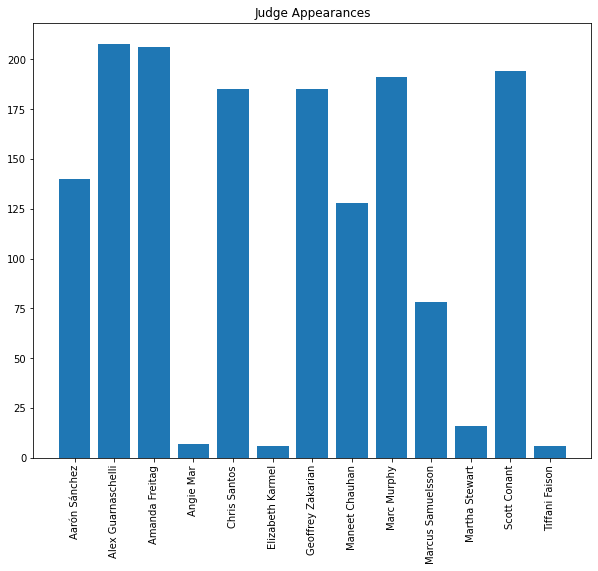

In [27]:
freq_judges = judge_app[judge_app > 5]    # Only plot the judges who have showed up > 5 times

fig, ax = plt.subplots()    
ax.bar(freq_judges.index, freq_judges)            
plt.xticks(freq_judges.index, rotation = "vertical")  
ax.set_title("Judge Appearances")    
fig.set_size_inches(10, 8)
plt.show()                                          

## Question 2: Which basket ingredients appear the most often in each round?
### First create a dictionary, with the key being the round title, and the value being a series with each ingredient and it's count

In [7]:
round_types = ["appetizer", "entree", "dessert"]    
round_ingredients = {}       # Creating an empty dictionary to house {round_type: ingredient_series}        

for epi_round in round_types:
    cleaned_data = chopped_data[chopped_data[epi_round].notnull()]  # Only grabbing data that isn't null
    
    ingredients = {}                                                # {ingredient: count}
    
    for basket in cleaned_data[epi_round]:                          # For a round of Chopped, grab the basket of ingredients
        round_ings = basket.split(",")                              # and break them up into a list of individual ingredients
        for ingredient in round_ings:                               # For each ingredient in that list of ingredients
            if ingredient.lower() in ingredients.keys():            # If it's already in the dictionary
                ingredients[ingredient.lower()] += 1                # increase it's count by one
            else:                                                   # If it's not in the dictionary
                ingredients[ingredient.lower()] = 1                 # Add it to the dictionary

    round_ingredients[epi_round] = pd.Series(ingredients)           # Populating the final dictionary

### Plot the ingredient counts for each round 

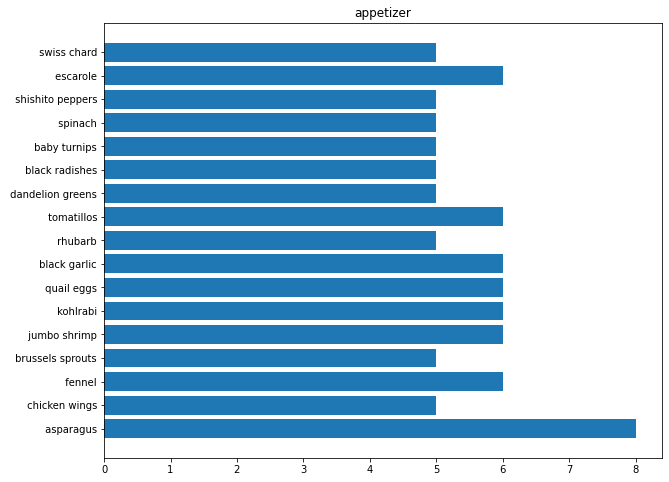

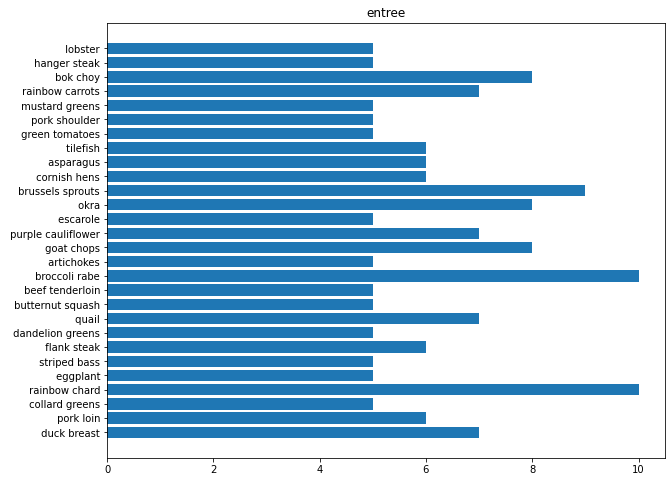

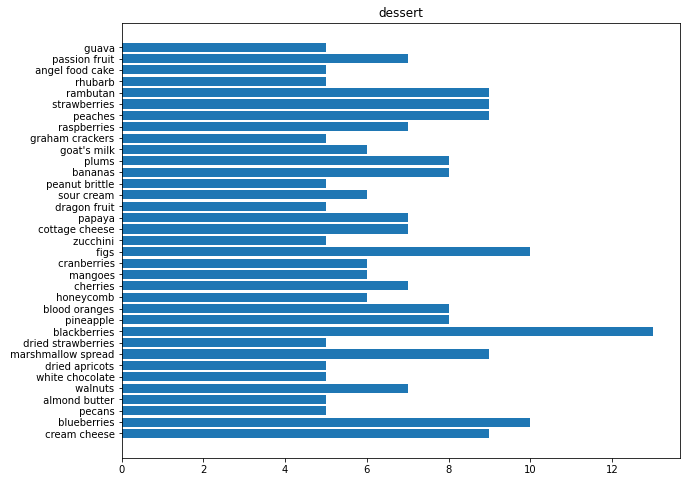

In [24]:
for round_type in round_ingredients:                               # For each round of the show
    round_series = round_ingredients[round_type]                   # create a series from the ingredients in the round
    freq_round_ings = round_series[round_series > 4]               # and only grab the ones that have showed up > 4 times
    
    fig, ax = plt.subplots()                                       # Create a matplotlib plot
    ax.barh(freq_round_ings.index.to_list(), freq_round_ings)      # which is a horizontal bar chart
    fig.set_size_inches(10, 8)                                     # and 10 by 8 inches
    ax.set_title(round_type)                                       # with a title that is the round type
    plt.show()                                                     # and show it.